                 Timestamp  total-bitcoins
1449  2022-12-17  16:07:34    1.923625e+07
1450  2022-12-21  09:06:09    1.923950e+07
1451  2022-12-25  09:34:35    1.924273e+07
1452  2022-12-29  06:00:43    1.924597e+07
1453  2023-01-01  14:52:19    1.924920e+07
1454  2023-01-05  01:07:51    1.925245e+07
1455  2023-01-08  06:57:00    1.925571e+07
1456  2023-01-11  13:41:10    1.925895e+07
1457  2023-01-14  20:58:47    1.926218e+07
1458  2023-01-18  06:10:07    1.926541e+07
1459  2023-01-21  20:23:27    1.926865e+07
1460  2023-01-25  09:47:56    1.927189e+07
1461  2023-01-28  15:10:08    1.927513e+07
1462  2023-02-01  07:14:01    1.927836e+07
1463  2023-02-05  00:16:47    1.928160e+07
1464  2023-02-08  13:49:53    1.928483e+07
1465  2023-02-12  00:29:42    1.928807e+07
1466  2023-02-15  08:12:51    1.929134e+07
1467  2023-02-18  08:47:54    1.929458e+07
1468  2023-02-21  15:50:55    1.929783e+07
1469  2023-02-25  02:46:25    1.930107e+07
1470  2023-02-28  19:38:35    1.930432e+07
1471  2023-

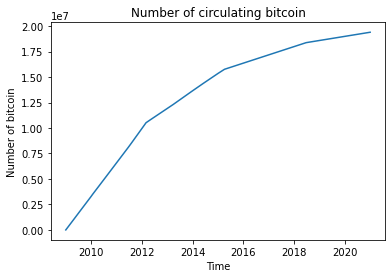

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
df=pd.read_csv('total-bitcoins(all-year).csv')
df['Datetime'] = pd.to_datetime(df['x'],
                                  unit='ms')
del df['x']
df.rename(columns = {'Datetime':'Timestamp','y':'total-bitcoins'}, inplace = True)
df=df.iloc[:,[1,0]]
df['Timestamp']=df['Timestamp'].dt.strftime('%Y-%m-%d  %H:%M:%S')

print(df.tail(50))
fig, ax = plt.subplots()
ax.set_title('Number of circulating bitcoin')
ax.set_ylabel('Number of bitcoin')
ax.set_xlabel('Time')


x = np.linspace(2009, 2021, len(df))
plt.plot(x, df['total-bitcoins'])
plt.show()



In [60]:
df['Timestamp'][0][0:4]

'2009'

# ZOOMING INTO BENT PART

         coins      time(ms)             timestamp
0      3237.50  1.685782e+12  2023-06-03  14:21:11
1      3256.25  1.685471e+12  2023-05-30  23:50:03
2      3237.50  1.685185e+12  2023-05-27  16:32:08
3      3231.25  1.684884e+12  2023-05-24  04:46:33
4      3231.25  1.684590e+12  2023-05-20  19:01:57
...        ...           ...                   ...
1493  25950.00  1.233112e+12  2009-01-28  08:34:50
1494  25850.00  1.232780e+12  2009-01-24  12:27:13
1495  25850.00  1.232374e+12  2009-01-19  19:43:41
1496  25850.00  1.231976e+12  2009-01-15  05:02:27
1497  25850.00  1.231548e+12  2009-01-10  06:17:57

[1498 rows x 3 columns]


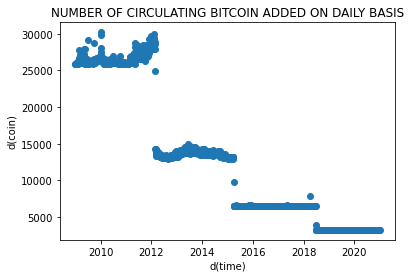

In [26]:
#SUBTRACTING LATEST DATA WITH PREVIOUS ONCE( TO FIND OUT HOW MUCH NUMBER OF CIRCULATING BITCOIN ADDED DAILY)
from datetime import datetime

i=1
dv=pd.DataFrame()
while i<len(df):
       df1=df.iloc[-i,1]-df.iloc[-(i+1),1]
       i=i+1
       df1=df1
       df2=datetime.strptime(df.iloc[-i,0],'%Y-%m-%d %H:%M:%S')
       df2=df2.timestamp() * 1000
       df3=df.iloc[-i,0]
       dv=dv.append({'coins':df1, 'time(ms)':df2,'timestamp':df3}, ignore_index=True)
print(dv)
from datetime import datetime
fig, ax = plt.subplots()
ax.set_title('NUMBER OF CIRCULATING BITCOIN ADDED ON DAILY BASIS')
ax.set_ylabel('d(coin)')
ax.set_xlabel('d(time)')
x = np.linspace(2021, 2009, len(dv))
ax.scatter(x, dv['coins'])


plt.show()



# As we can see number of increament in circulating bitcoin gradually decrease in some spam of years , we try find out at what time this fall down is happening.


In [27]:
#for 1st downfall
for i in range(1,len(dv)-1):    
    if (dv.iloc[i,0]-dv.iloc[i-1,0]>1000) &  (dv.iloc[i+1,0]-dv.iloc[i,0]>10):
        print(dv.iloc[i,1],dv.iloc[i,2])
        
        

1588853811000.0 2020-05-07  17:46:51
1467919521000.0 2016-07-08  00:55:21
1353869210000.0 2012-11-26  00:16:50
1353547655000.0 2012-11-22  06:57:35
1349528178000.0 2012-10-06  18:26:18
1335270176000.0 2012-04-24  17:52:56
1326606866000.0 2012-01-15  11:24:26
1278936436000.0 2010-07-12  17:37:16
1254592550000.0 2009-10-03  23:25:50


# Above are the time at which number of circulating coin added on daily basis decrease gradually 


# (marking above point(time) at market price graph)


In [65]:
o=pd.DataFrame()
def time(start,end,fall):
            dn=pd.read_csv('market-price')
            dn['year1']=pd.DatetimeIndex(dn['Timestamp']).year
            dn['year']=pd.DatetimeIndex(dn['Timestamp']).year
            dn=dn.set_index(['year1'])
            dn=dn.iloc[lambda x:x.index>=start]
            dn=dn.iloc[lambda x:x.index<=end]
            
            dn=dn.reset_index()
            dn=dn.drop(['year1'], axis=1)
            dn
            from datetime import datetime
            dn2=pd.DataFrame()
            fig, ax = plt.subplots()
            ax.set_title(f'{start}-{end}')
            ax.set_ylabel('d(coin)')
            ax.set_xlabel('d(time)')
            for i in range(0,len(dn)):

                dn1=datetime.strptime(dn.iloc[i,0],'%Y-%m-%d %H:%M:%S')
                dn1=dn1.timestamp() * 1000
                dn2=dn2.append({'time':dn1},ignore_index=True)
            dn['time']=dn2['time']
            for i in range(0,len(dn)):
                if dn.iloc[i,3]>=fall:
                    print(dn.iloc[i,0],dn.iloc[i,1])
                    p=dn.iloc[i,3]
                    m=dn.iloc[i,1]
                    break
            print(dn)


            x = np.linspace(start, end, len(dn))
            ax.scatter(dn['t',dn['market-price'] )
            plt.annotate('min',(p,m),arrowprops=dict(facecolor='black', shrink=0.01))
            #plt.plot(p,m,'m^')



            plt.show()


In [66]:
df['Timestamp'][0][0:4]

'2009'

2020-05-11 00:00:00 8754.46
               Timestamp  market-price  year          time
0    2017-01-03 00:00:00       1013.42  2017  1.483382e+12
1    2017-01-06 00:00:00        999.65  2017  1.483641e+12
2    2017-01-09 00:00:00        910.49  2017  1.483900e+12
3    2017-01-12 00:00:00        780.92  2017  1.484159e+12
4    2017-01-15 00:00:00        819.55  2017  1.484419e+12
..                   ...           ...   ...           ...
595  2021-11-23 00:00:00      56301.52  2021  1.637606e+12
596  2021-11-26 00:00:00      58935.45  2021  1.637865e+12
597  2021-11-29 00:00:00      57292.28  2021  1.638124e+12
598  2021-12-02 00:00:00      57229.76  2021  1.638383e+12
599  2021-12-05 00:00:00      49253.86  2021  1.638643e+12

[600 rows x 4 columns]


ValueError: x and y must be the same size

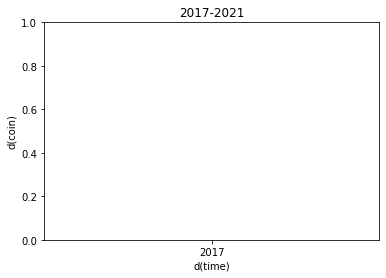

In [67]:
time(2017,2021,1588883216000.0)

2016-07-10 00:00:00 647.41


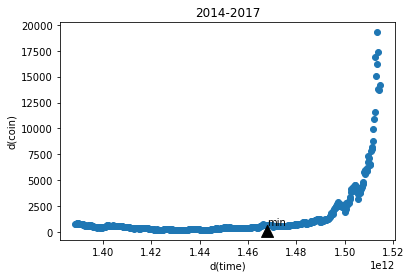

In [19]:
time(2014,2017,1467919521000.0)

2012-11-28 00:00:00 12.5


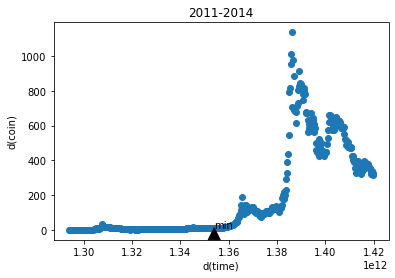

In [14]:
time(2011,2014,1353869210000.0)

# conclusion

((Data collected from  =  https://www.blockchain.com/charts))